## Model Development
We will develop prediction models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('usedcars.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## 1. Linear Regression and Multiple Linear Regression

### Linear Regression
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

In [4]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

### How does 'highway-mpg' predict the 'price'?

In [5]:
lm.fit(df[['highway-mpg']], df['price']) # X (features): must always be 2D, Y 1D is fine

LinearRegression()

In [6]:
#To get our predictions for the response: 
Yhat = lm.predict(df[['highway-mpg']])
Yhat[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [7]:
df['price'][0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
# Intercept and slope
print(f'The intercept is: {lm.intercept_}, and the slope is: {lm.coef_}')

The intercept is: 38423.305858157386, and the slope is: [-821.73337832]


In [9]:
lm1= LinearRegression()
lm1

LinearRegression()

In [10]:
df['engine-size'].dtypes

dtype('int64')

### How does 'engine-size' predict the 'price'?

In [11]:
lm1.fit(df[['engine-size']], df['price'])

LinearRegression()

In [12]:
# Intercept and slope
print(f'The intercept is: {lm1.intercept_}, and the slope is: {lm1.coef_}')

The intercept is: -7963.338906281049, and the slope is: [166.86001569]


In [13]:
Yhat1 = lm1.predict(df[['engine-size']])
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

### Multiple Linear Regression
<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$
and:
$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous EDA, we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [14]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2 = LinearRegression()
lm2.fit(X, df['price'])

LinearRegression()

In [15]:
# Intercept and slope
print(f'The intercept is: {lm2.intercept_}, and the slope is: {lm2.coef_}')

The intercept is: -15806.624626329198, and the slope is: [53.49574423  4.70770099 81.53026382 36.05748882]


In [16]:
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses', 'highway-mpg']], df['price'])
print(f'The intercept is: {lm3.intercept_}, and the slope is: {lm3.coef_}')

The intercept is: 38201.313272457264, and the slope is: [   1.49789586 -820.45434016]


## 2. Model Evaluation Using Visualization

In [17]:
%matplotlib inline

### Regression Plot

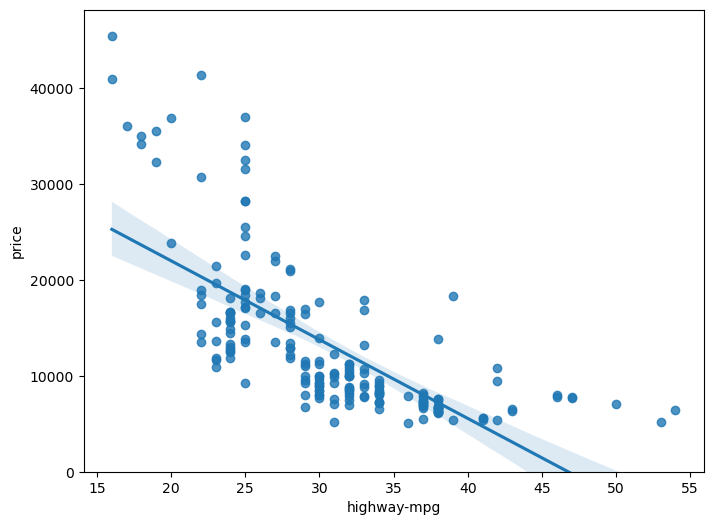

In [20]:
width =8
height = 6
plt.figure(figsize = (width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data =df)
plt.ylim(0,)
plt.show()

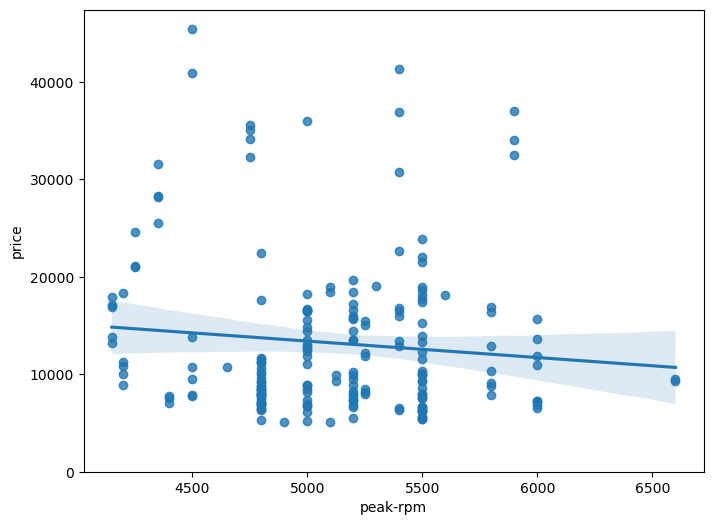

In [23]:
plt.figure(figsize = (width, height))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)
plt.show()

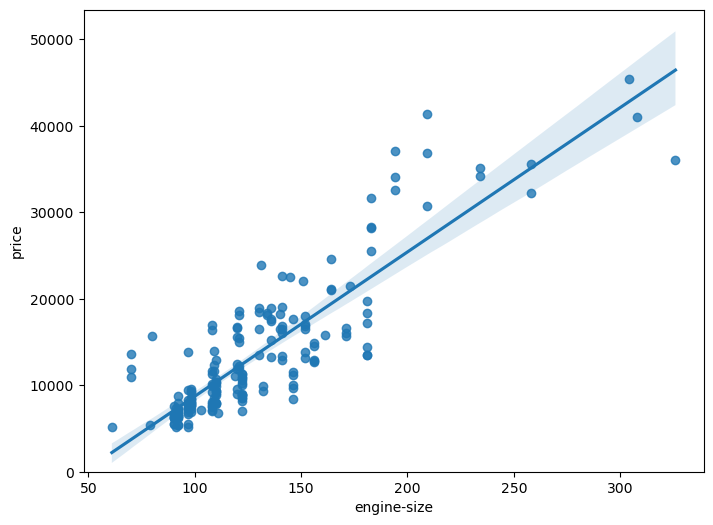

In [24]:
plt.figure(figsize = (width, height))
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)
plt.show()

Comparing these three regressions, we are seeing the points of peak-rpm are much spreak around the line, which indicates a difficulty in predicting the kind of correlation between predictor and the price (large variance), which makes me decide to exclude it from depending on it as a reliable predicotr. 

In [26]:
df[['peak-rpm', 'engine-size', 'highway-mpg', 'price']].corr()

,peak-rpm,engine-size,highway-mpg,price
peak-rpm,1.000000,-0.256733,-0.058598,-0.101616
engine-size,-0.256733,1.000000,-0.679571,0.872335
highway-mpg,-0.058598,-0.679571,1.000000,-0.704692
price,-0.101616,0.872335,-0.704692,1.000000


### Redisual Plot
<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

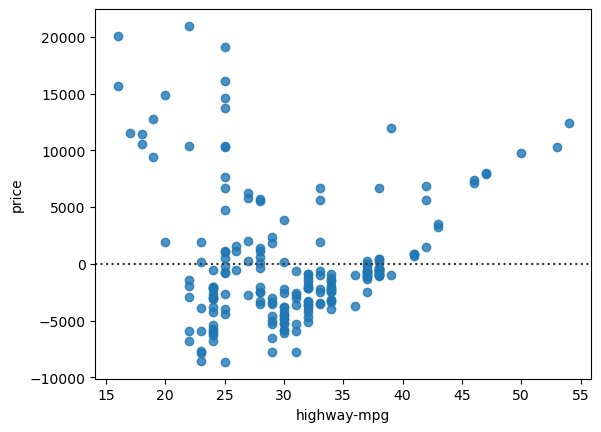

In [27]:
sns.residplot(x=df['highway-mpg'], y = df['price'])
plt.show()

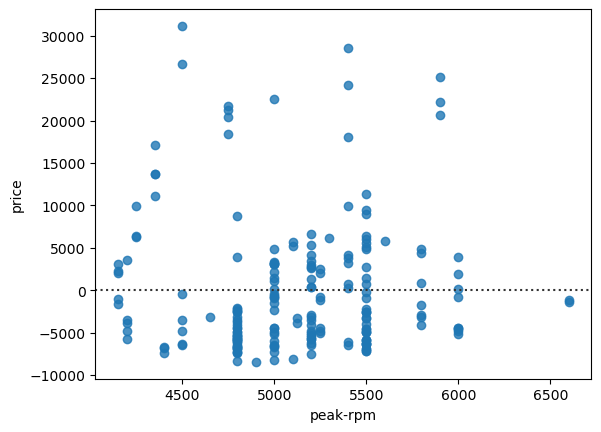

In [28]:
sns.residplot(x=df['peak-rpm'], y = df['price'])
plt.show()

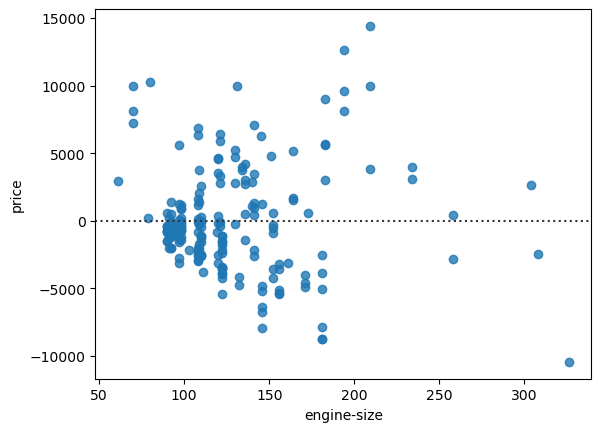

In [29]:
sns.residplot(x=df['engine-size'], y = df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot of 'highway-mpg' vs 'price', that the residuals are not randomly spread around the x-axis, (positive, then negative, then positive, there is a clear pattern) leading us to believe that maybe a non-linear model is more appropriate for this data.</p>

### Multiple Linear Regression Visulization
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because we can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [30]:
Yhat2 = lm2.predict(X)

C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3975011586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3975011586.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

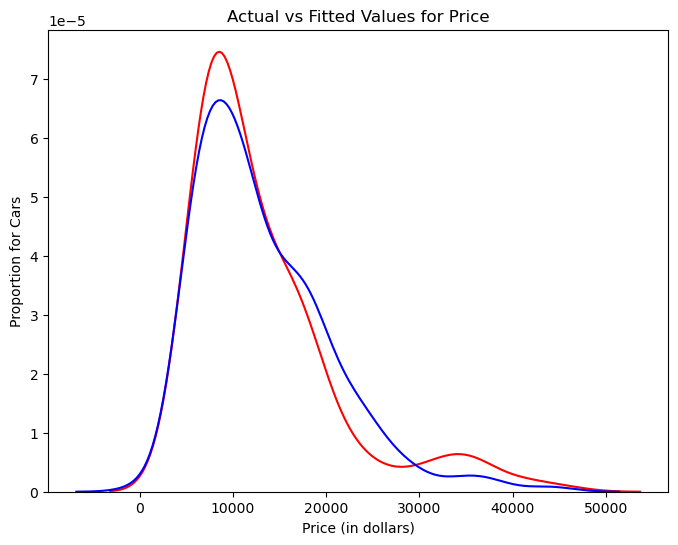

In [41]:
plt.figure(figsize=(8,6))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
sns.distplot(Yhat2, hist = False, color = 'b', label = 'Predicted Values', ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion for Cars')

plt.show()

## 3. Polynomial Regression and Pipelines
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

We will use the following function to plot the data:


In [42]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [43]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [44]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


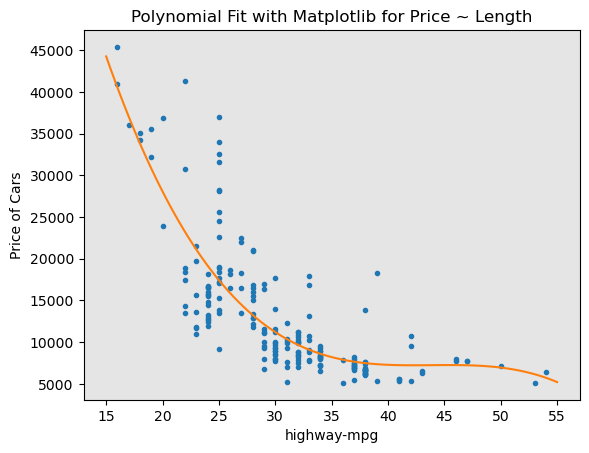

In [45]:
PlotPolly(p, x, y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [48]:
# Here we use a polynomial of the 11th order 
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


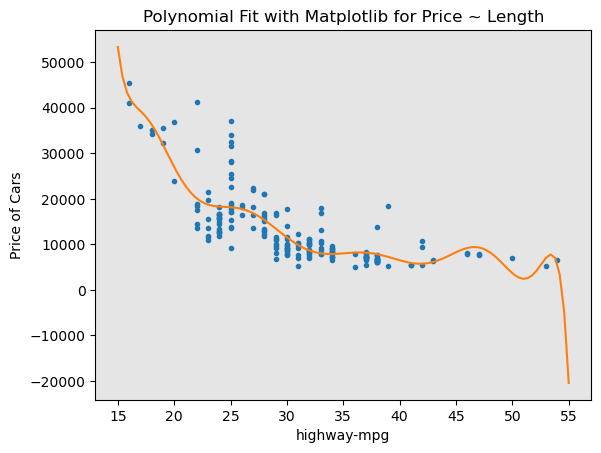

In [49]:
PlotPolly(p, x, y, 'highway-mpg')

The analytical expression for Multivariate Polynomial function gets complicated, that is why we will not be able to use np.polyfit method for multivariate. For example, the expression for a second-order (degree=2) polynomial with two variables is given by: 

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features. First, we import the module:

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [80]:
X_pr = pr.fit_transform(X)

In [81]:
X.shape

(201, 4)

In [82]:
X_pr.shape

(201, 15)

### Pipelines
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [83]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree =2, include_bias = False)), ('model', LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [84]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [85]:
X = X.astype(float)
pipe.fit(X, df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [86]:
ypipe = pipe.predict(X)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3214548630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3214548630.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

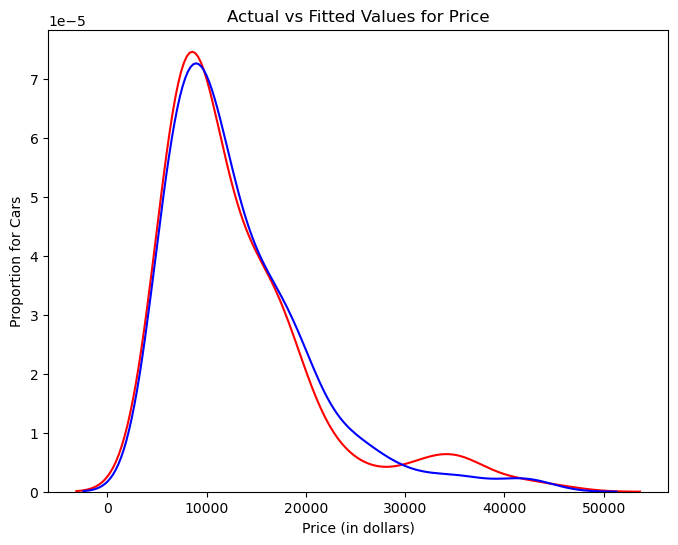

In [87]:
plt.figure(figsize=(8,6))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
sns.distplot(ypipe, hist = False, color = 'b', label = 'Predicted Values', ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion for Cars')

plt.show()

In [88]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X, df['price'])
ypipe = pipe.predict(X)

C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3214548630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
C:\Users\ahmed\OneDrive\Desktop\temporary_files\TEMP\ipykernel_8680\3214548630.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

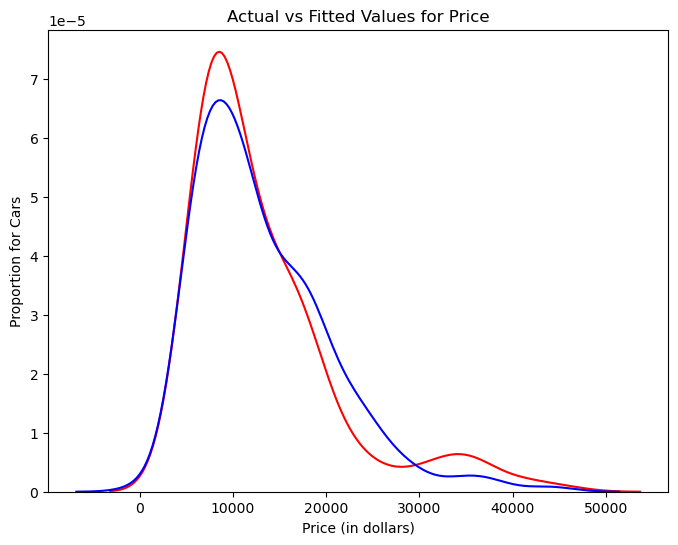

In [89]:
plt.figure(figsize=(8,6))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Values')
sns.distplot(ypipe, hist = False, color = 'b', label = 'Predicted Values', ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion for Cars')

plt.show()

* **Without `PolynomialFeatures`**: Standardize then fit a plain linear regression on the original features (power = 1). Captures only straight-line relationships; simpler, fewer parameters.

* **With `PolynomialFeatures`**: After scaling, expand features to include squares and cross-terms. Linear regression is applied to this expanded set, so it can model **curvature and interactions**; more flexible but higher risk of overfitting.

* **Predictions**: Differ when the true relationship is non-linear (poly usually fits better); similar when the relationship is truly linear.


<h2>4. Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2:

In [90]:
#highway_mpg_fit
X = df[['highway-mpg']]   # double brackets → DataFrame (n,1)
y = df['price']           # Series (n,)

lm.fit(X, y)
print("The R-square is:", lm.score(X, y))

The R-square is: 0.4965911884339175


Let's calculate the MSE:

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], lm.predict(X))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

In [92]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit the model 
lm.fit(X, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(X, df['price']))

The R-square is:  0.8093562806577457


In [93]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], lm.predict(X)))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2.

Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.

In [94]:
from sklearn.metrics import r2_score

In [95]:
x = df['highway-mpg']
y = df['price']
r_squared = r2_score(y, p(x))
print('The R-Square value is:',r_squared)

The R-Square value is: 0.7023769094721823


In [96]:
mean_squared_error(df['price'], p(x))

18703127.624789312

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
